In [1]:
import pandas as pd

In [2]:
data_frame=pd.read_csv('dataset.csv')

In [3]:
# Display the first few rows of the dataset
data_frame.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Checking data types
data_frame.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
# Checking for missing values
data_frame.isnull().sum()

# Handling missing values in the 'TotalCharges' column
data_frame['TotalCharges'] = pd.to_numeric(data_frame['TotalCharges'], errors='coerce')

# Filling missing values with the median
data_frame['TotalCharges'].fillna(data_frame['TotalCharges'].median(), inplace=True)


In [6]:
# Encoding categorical features using pandas' get_dummies
df_encoded = pd.get_dummies(data_frame, drop_first=True)

# Checking the encoded dataframe
df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True


In [7]:
print(df_encoded.head())

   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  customerID_0003-MKNFE  \
0              0       1           29.85         29.85                  False   
1              0      34           56.95       1889.50                  False   
2              0       2           53.85        108.15                  False   
3              0      45           42.30       1840.75                  False   
4              0       2           70.70        151.65                  False   

   customerID_0004-TLHLJ  customerID_0011-IGKFF  customerID_0013-EXCHZ  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   customerID_0013-MHZWF  customerID_0013-SMEOE  ...  StreamingTV_Ye

In [8]:
# Descriptive statistics
df_encoded.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


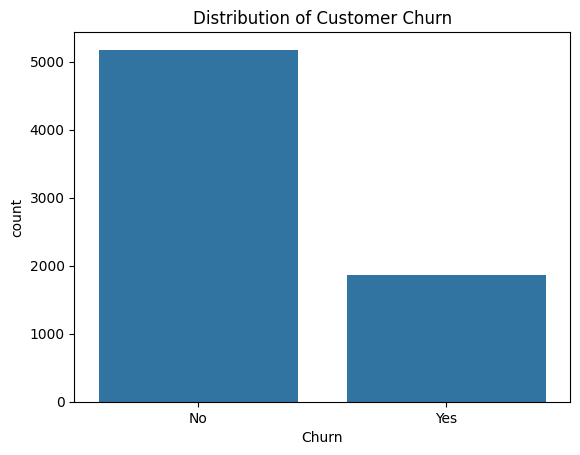

In [9]:
# Importing visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of churn
sns.countplot(x='Churn', data=data_frame)
plt.title('Distribution of Customer Churn')
plt.show()

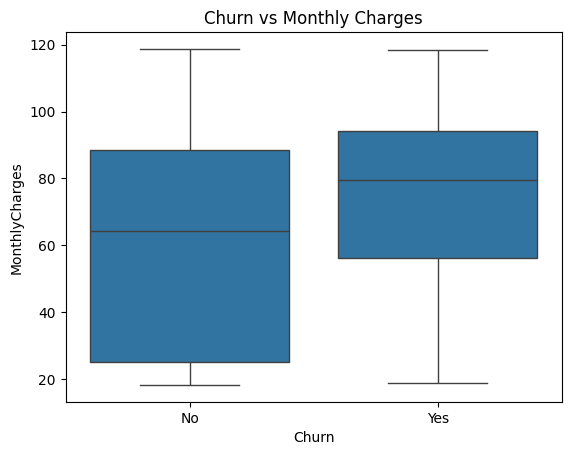

In [10]:
# Boxplot for monthly charges
sns.boxplot(x='Churn', y='MonthlyCharges', data=data_frame)
plt.title('Churn vs Monthly Charges')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'Churn_Yes' is the correct target column after encoding
X = df_encoded.drop('Churn_Yes', axis=1)  # Drop the target column from the features
y = df_encoded['Churn_Yes']  # Set the target column

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initializing and training the Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [13]:
# Predicting churn on the test set
y_pred_logreg = logreg.predict(X_test_scaled)

# Evaluating the model
logreg_acc = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {logreg_acc:.2f}")

# Confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.78
[[1474   65]
 [ 407  167]]
              precision    recall  f1-score   support

       False       0.78      0.96      0.86      1539
        True       0.72      0.29      0.41       574

    accuracy                           0.78      2113
   macro avg       0.75      0.62      0.64      2113
weighted avg       0.77      0.78      0.74      2113



In [14]:
from sklearn.ensemble import RandomForestClassifier

# Initializing and training the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [15]:
# Predicting churn on the test set
y_pred_rf = rf.predict(X_test_scaled)

# Evaluating the model
rf_acc = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_acc:.2f}")

# Confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.80
[[1437  102]
 [ 318  256]]
              precision    recall  f1-score   support

       False       0.82      0.93      0.87      1539
        True       0.72      0.45      0.55       574

    accuracy                           0.80      2113
   macro avg       0.77      0.69      0.71      2113
weighted avg       0.79      0.80      0.78      2113



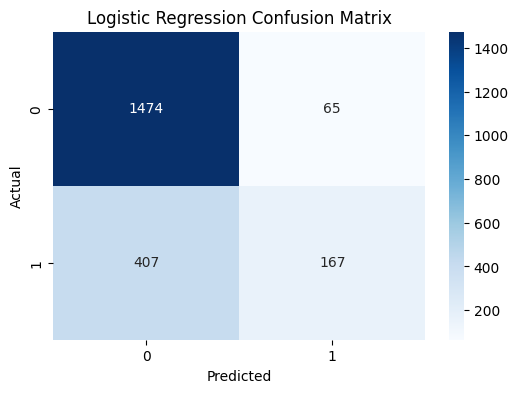

Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       0.78      0.96      0.86      1539
        True       0.72      0.29      0.41       574

    accuracy                           0.78      2113
   macro avg       0.75      0.62      0.64      2113
weighted avg       0.77      0.78      0.74      2113

Logistic Regression Accuracy: 0.78


In [17]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predicting on the test set
y_pred_log_reg = logreg.predict(X_test_scaled)

# Confusion Matrix for Logistic Regression
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)

# Plotting the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report for Logistic Regression
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Accuracy for Logistic Regression
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.2f}")


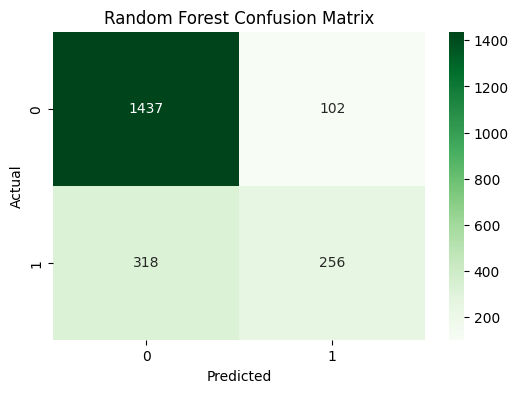

Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.82      0.93      0.87      1539
        True       0.72      0.45      0.55       574

    accuracy                           0.80      2113
   macro avg       0.77      0.69      0.71      2113
weighted avg       0.79      0.80      0.78      2113

Random Forest Accuracy: 0.80


In [18]:
# Predicting on the test set using Random Forest
y_pred_rf = rf.predict(X_test_scaled)

# Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plotting the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report for Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Accuracy for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
